In [165]:
import pandas as pd
import numpy as np

In [166]:
Data = pd.read_csv(r"D:\ALGORITMO RECLUTADOR\Proyecto 19-01.remplazo\Todo el proyecto\Data Posición\Delanteros.csv")
pd.set_option('display.max_columns', None)

In [167]:
Goals_media = Data["Goals"].mean()
Goals_min = Data["Goals"].min()
Goals_max = Data["Goals"].max()
print(Goals_media)
print(Goals_min)
print(Goals_max)

print("-"*100)

Successful_media = Data["Successful dribbles %"].mean()
Successful_min = Data["Successful dribbles %"].min()
Successful_max = Data["Successful dribbles %"].max()
print(Successful_media)
print(Successful_min)
print(Successful_max)

print("-"*100)

shots_media = Data["Total shots"].mean()
shots_min = Data["Total shots"].min()
shots_max = Data["Total shots"].max()
print(shots_media)
print(shots_min)
print(shots_max)

print("-"*100)

missed_media = Data["Big chances missed"].mean()
missed_min = Data["Big chances missed"].min()
missed_max = Data["Big chances missed"].max()
print(missed_media)
print(missed_min)
print(missed_max)


0.18639075753144194
0.0
1.04
----------------------------------------------------------------------------------------------------
45.05929804036268
0.0
100.0
----------------------------------------------------------------------------------------------------
1.40068733547821
0.0
5.5
----------------------------------------------------------------------------------------------------
0.16380228136882127
0.0
1.0


In [168]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import unicodedata
import matplotlib.pyplot as plt


Columna_habilidades = Data.columns.drop(["Name", "League"])

features = Data[Columna_habilidades]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6)  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)

caracteristicas_grafico = ['Goals', 'Big chances missed', 'Successful dribbles %', 'Total shots', 'Headed goals', 'Set piece conversion %', 'Assists']

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    # Normaliza el nombre que buscas
    nombre_normalizado = normalizar_nombre(nombre)

    # Aplica la normalización a los nombres en el conjunto de datos
    Data['Name_Normalized'] = Data['Name'].apply(normalizar_nombre)

    # Busca el jugador con el nombre normalizado
    jugador = Data[Data['Name_Normalized'] == nombre_normalizado]

    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0]]  # Excluimos el primer resultado porque será el jugador mismo

        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        jugadores_similares_scaled = scaler.transform(jugadores_similares[features.columns])

        # Define una lista de colores
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

        # Crea un gráfico de radar para cada jugador similar
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares_scaled):
            color = colores[i % len(colores)]  # Elige un color de la lista
            fig.add_trace(go.Scatterpolar(
                r=row[features.columns.isin(caracteristicas_grafico)],
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name'],
                line=dict(color=color)
            ))

        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 6]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()
        
       # Configura una cuadrícula de subplots con 2 filas y 2 columnas
        fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario

        # Gráfico de dispersión para la media-Goals
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Goals'], color=colores[i % len(colores)], marker='o')
        for line in [Goals_max, Goals_media, Goals_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Goals de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Goals')

        # Gráfico de dispersión para la media-Successful
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Successful dribbles %'], color=colores[i % len(colores)], marker='o')
        for line in [Successful_max, Successful_media, Successful_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Comparativa de Successful de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Successful')

        # Gráfico de dispersión para la media-shots
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Total shots'], color=colores[i % len(colores)], marker='o')
        for line in [shots_max, shots_media, shots_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Comparativa de shots de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('shots')

        # Gráfico de dispersión para la media-missed
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances missed'], color=colores[i % len(colores)], marker='o')
        for line in [missed_max, missed_media, missed_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Comparativa de missed de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('missed')

        # Ajusta el layout para que no haya superposición de elementos
        plt.tight_layout()
        plt.show()


        return 

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Interceptions,Big chances created,Assists,Accurate passes %,Aerial duels won %,Total duels won %,Was fouled,Appearances,Age Range,Position,League,Level,Name_Normalized
3220,Karim Benzema,0.79,0.75,47.62,4.46,0.04,0.69,0.08,0.58,0.13,87.04,51.85,37.98,0.25,24,3,4,España La Liga 1,1,karim benzema
336,Kylian Mbappé,0.85,0.82,40.44,4.38,0.03,0.00,0.15,0.50,0.15,82.95,61.54,41.77,1.18,34,2,4,Francia Liga 1,2,kylian mbappe
3221,Robert Lewandowski,0.68,0.79,53.57,3.97,0.03,0.00,0.06,0.32,0.21,78.08,53.06,47.23,1.35,34,3,4,España La Liga 1,1,robert lewandowski
2721,Christopher Nkunku,0.64,0.68,58.46,2.96,0.08,1.14,0.32,0.32,0.16,81.85,39.53,46.23,1.48,25,2,4,Alemania Bundesliga 1,1,christopher nkunku
1962,Quincy Promes,0.74,0.41,50.00,3.67,0.07,0.00,0.07,0.48,0.26,83.29,40.00,43.11,0.74,27,3,4,Rusia Premier Liga,4,quincy promes
1728,Mehdi Taremi,0.67,0.52,50.00,2.91,0.06,0.00,0.24,0.33,0.21,75.03,52.14,49.52,1.27,33,3,4,Liga Portugal,2,mehdi taremi


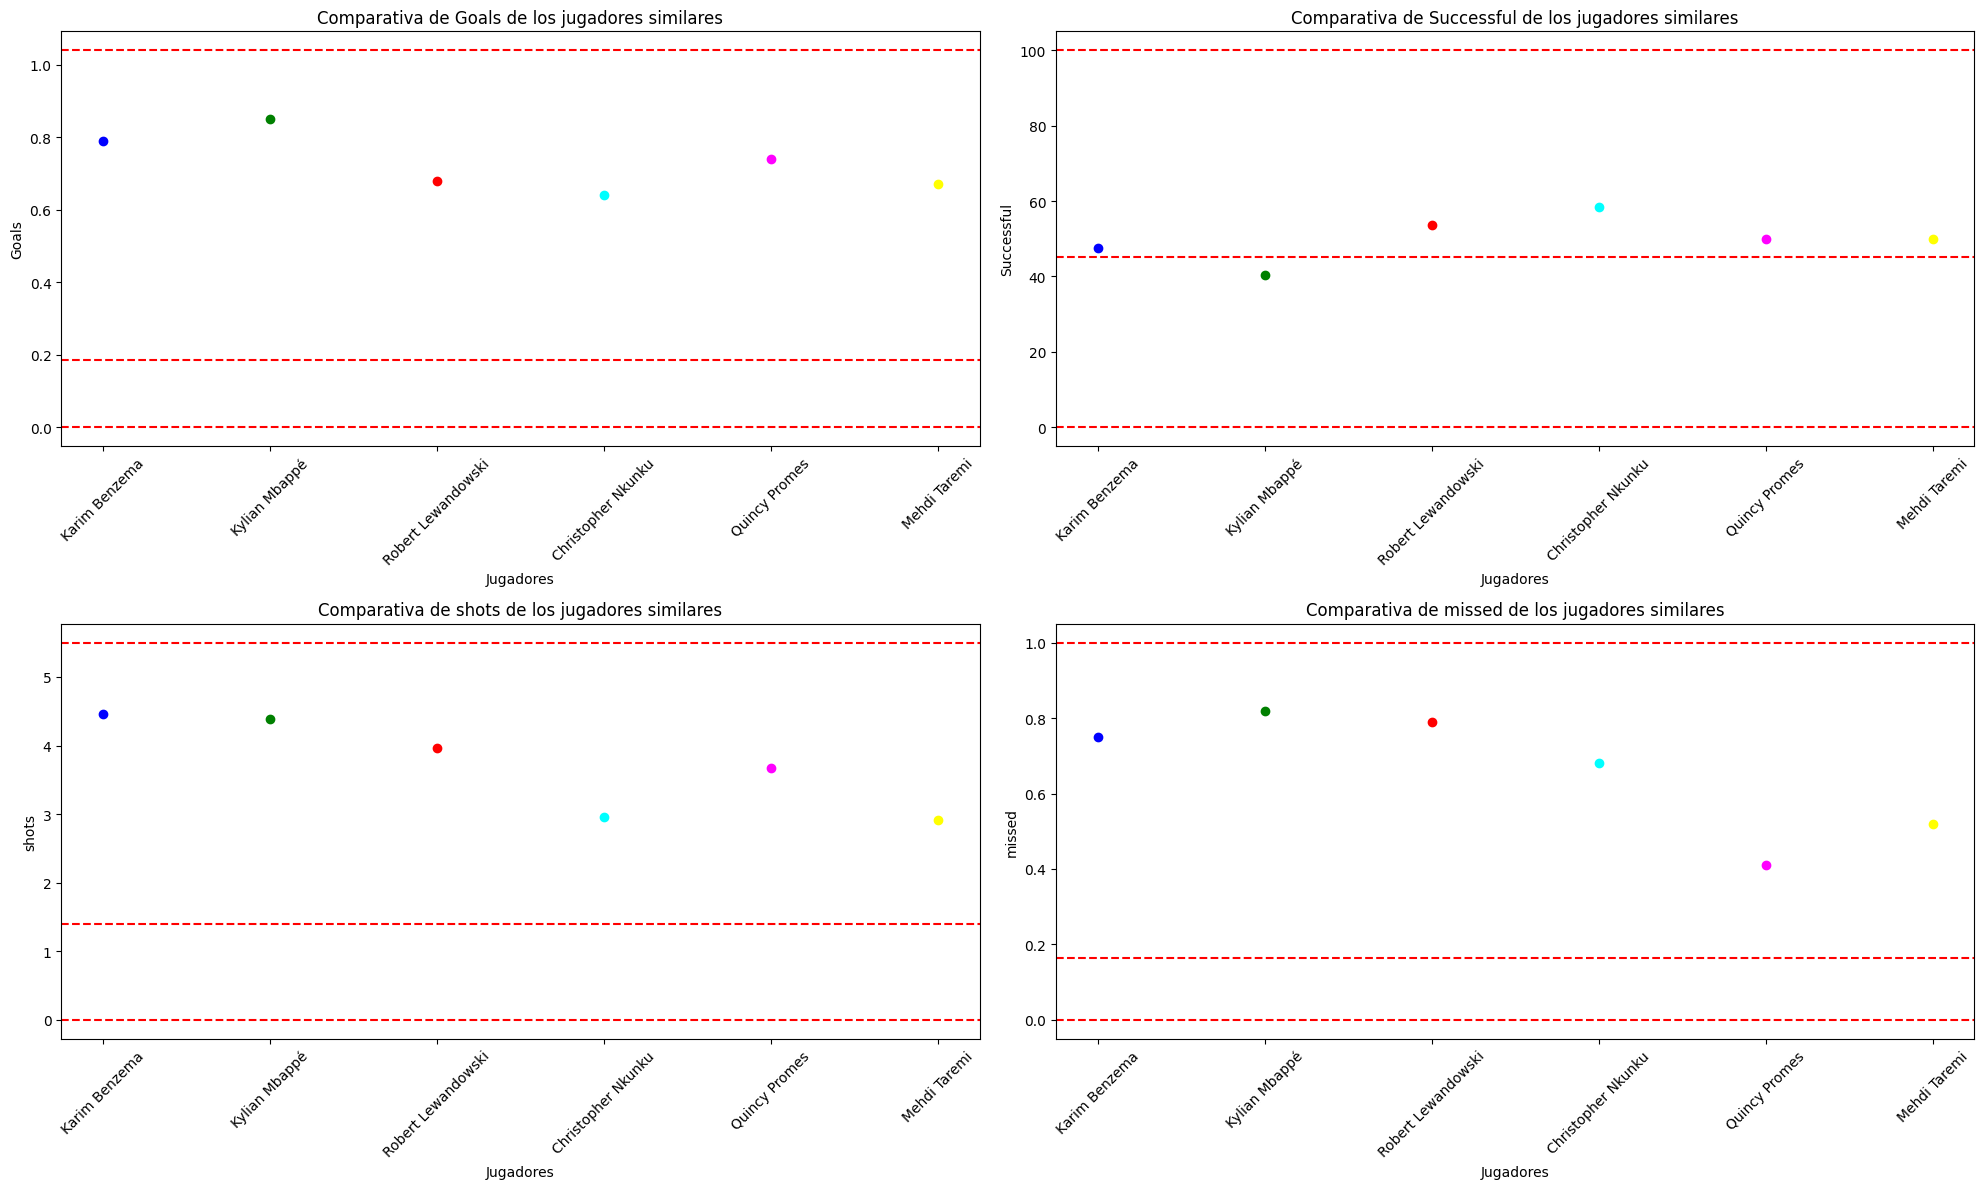

In [169]:
buscar_jugadores_similares('karim benzema', caracteristicas_grafico)